
<img src="assets/bricks.jpg">


# Import Statements

In [5]:
import pandas as pd

# Data Exploration

How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours.

In [87]:
df = pd.read_csv('Data/colors.csv')

In [88]:
df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [89]:
df['name'].nunique()

135

Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. We can accomplish this in two different ways.

In [90]:
df.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [91]:
df.is_trans.value_counts()

is_trans
f    107
t     28
Name: count, dtype: int64

Change this into an h3 section heading: Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="Assets/logo_sets.png"> 

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="assets/logo_themes.png"> 

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

Read the sets.csv data and take a look at the first and last couple of rows.

In [92]:
df_sets = pd.read_csv('Data/sets.csv')

In [93]:
df_sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In which year were the first LEGO sets released and what were these sets called?

In [94]:
df_sets.sort_values('year').head()


,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [95]:
df_sets[df_sets['year'] == 1949].head()

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


Find the top 5 LEGO sets with the most number of parts.

In [96]:
df_sets.sort_values('num_parts', ascending=False).head(5)

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019?

In [97]:
count_sets = df_sets.groupby('year').count()

In [98]:
count_sets['set_num'].head(5)

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

In [99]:
df_sets.groupby('year').count().tail()

,set_num,name,theme_id,num_parts
year,,,,
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840
2020,674,674,674,674
2021,3,3,3,3


In [100]:
import matplotlib.pyplot as plt

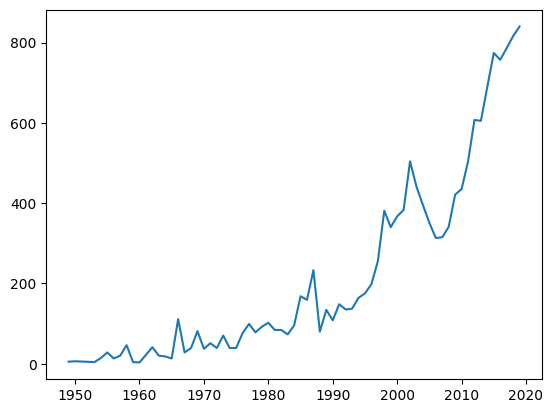

In [101]:
plt.plot(count_sets.index[:-2], count_sets.set_num[:-2])

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [102]:
themes_by_year = df_sets.groupby('year').agg({'theme_id':pd.Series.nunique})
themes_by_year.rename (columns = {'theme_id': 'n_themes'}, inplace = True)
themes_by_year.tail()

,n_themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021).

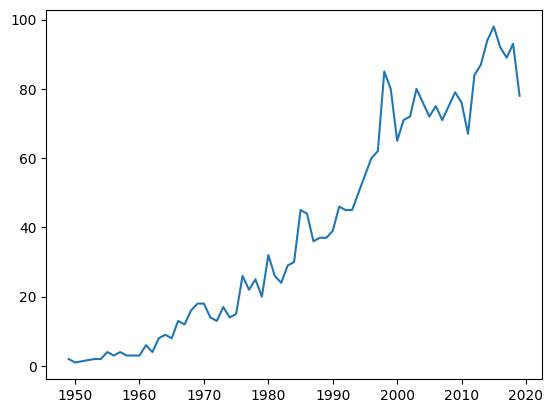

In [103]:
plt.plot(themes_by_year.index[:-2], themes_by_year.n_themes[:-2])

### Line Charts with Two Seperate Axes

Text(0, 0.5, 'number of sets')

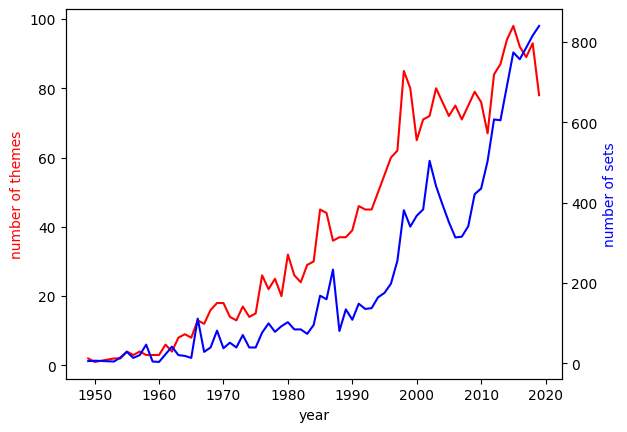

In [104]:
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(themes_by_year.index[:-2], themes_by_year.n_themes[:-2], color='red')
ax2.plot(count_sets.index[:-2], count_sets.set_num[:-2], color='blue')
ax1.set_xlabel('year')
ax1.set_ylabel('number of themes', color='red')
ax2.set_ylabel('number of sets', color='blue')


Figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [105]:
parts_per_set = df_sets.groupby('year').agg({'num_parts':pd.Series.mean})
parts_per_set.rename(columns = {'num_parts': 'avg_num_parts'}, inplace = True)
parts_per_set.head()

,avg_num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


In [106]:
parts_per_set.tail()

,avg_num_parts
year,
2017,221.840967
2018,213.618873
2019,207.510714
2020,259.732938
2021,0.000000


### Scatter Plots in Matplotlib

Plot the average number of parts over time using a Matplotlib scatter plot. The size and complexity of LEGO sets has increased over time based on the number of parts?

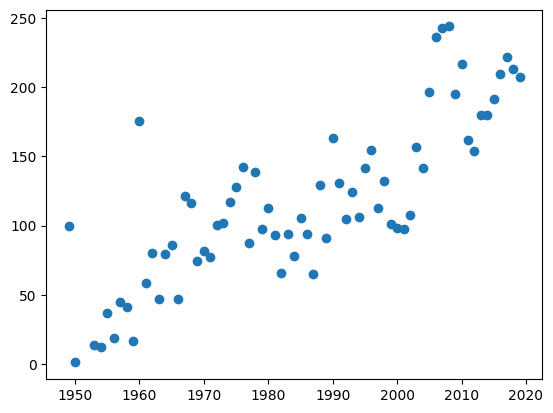

In [107]:
plt.scatter(parts_per_set.index[:-2], parts_per_set.avg_num_parts[:-2])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [108]:
df_sets.theme_id.value_counts()

theme_id
158    753
501    656
494    398
435    356
503    329
      ... 
307      1
215      1
361      1
210      1
414      1
Name: count, Length: 571, dtype: int64

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<img src="Assets/rebrickable_schema.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. Search for the name 'Star Wars'. How many ids correspond to the 'Star Wars' name in the themes.csv?

Use the ids to look for the corresponding sets in the sets.csv

In [109]:
df_themes = pd.read_csv('Data/themes.csv')

In [110]:
df_themes[df_themes.name == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [111]:
df_sets[df_sets.theme_id == 18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


In [112]:
df_sets[df_sets.theme_id == 158]

,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94
...,...,...,...,...,...
15686,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0
15689,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


### Merging (i.e., Combining) DataFrames based on a Key


In [113]:
theme_count = df_sets.theme_id.value_counts()  #theme_id and no of sets per theme return series
theme_count.head()

theme_id
158    753
501    656
494    398
435    356
503    329
Name: count, dtype: int64

In [114]:
theme_count = pd.DataFrame({'id': theme_count.index, 'set_count': theme_count.values}) #convert series into DataFrame
theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [115]:
merged_df = pd.merge(theme_count, df_themes, on='id')
merged_df[:3]

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN


<BarContainer object of 10 artists>

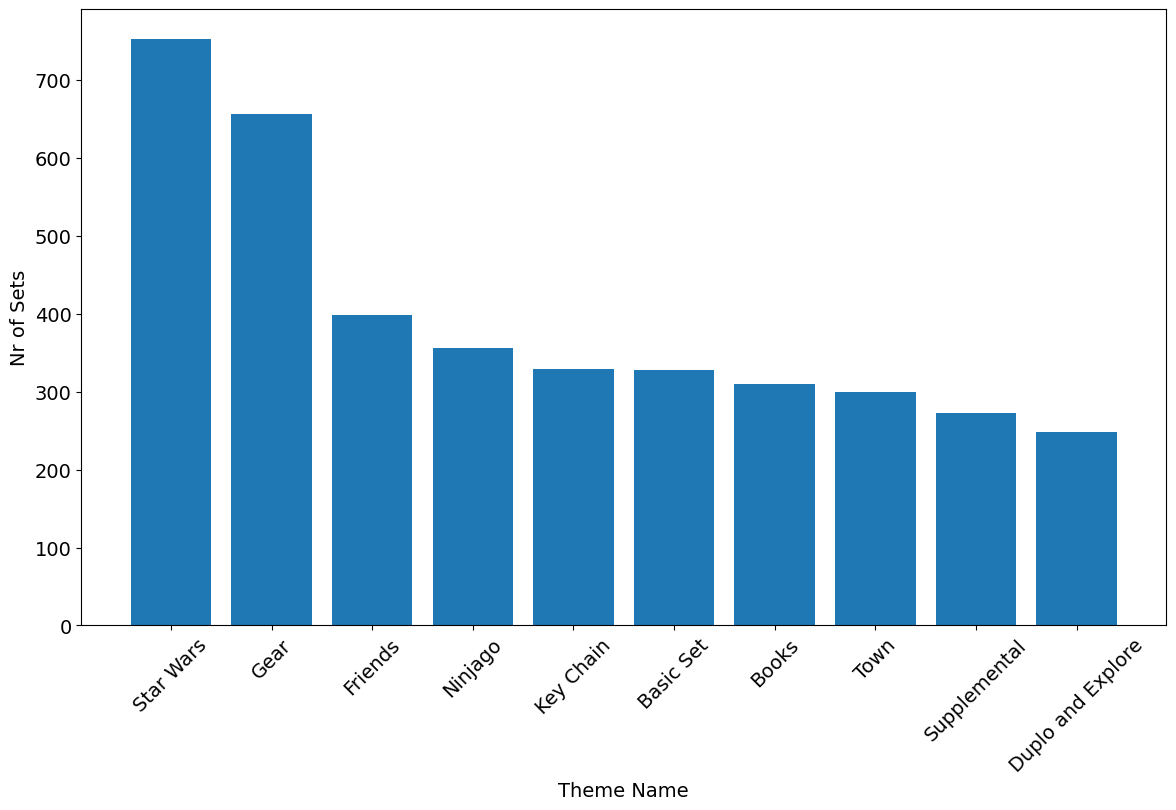

In [116]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)
plt.bar(merged_df.name[:10], merged_df.set_count[:10])